In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [2]:
%load_ext tensorboard

In [3]:
logdir='log'

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels),
          callbacks=[tensorboard_callback]
          )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 34ms/step - accuracy: 0.8976 - loss: 0.3269 - val_accuracy: 0.9870 - val_loss: 0.0448
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9871 - loss: 0.0415 - val_accuracy: 0.9905 - val_loss: 0.0319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9905 - loss: 0.0305 - val_accuracy: 0.9908 - val_loss: 0.0310
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9932 - loss: 0.0220 - val_accuracy: 0.9922 - val_loss: 0.0263
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9912 - val_loss: 0.0299


In [8]:
y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


Para calcular as métricas de avaliação temos o seguinte:

---
Sensibilidade = VP/(VP+FN)

Acurácia = Total de acertos/Total de itens

Especificidade = VN/VN+FP

Precisão = VP/VP+FP

F-score = 2* (precisão*sensibilidade)/(precisão+sensibilidade)

Curva de ROC: Permite avaliar um classificador binário






In [9]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
cm_norm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)


In [10]:
classes = ['0','1','2','3','4','5','6','7','8','9']
cm_df = pd.DataFrame(cm_norm, index=classes, columns=classes)


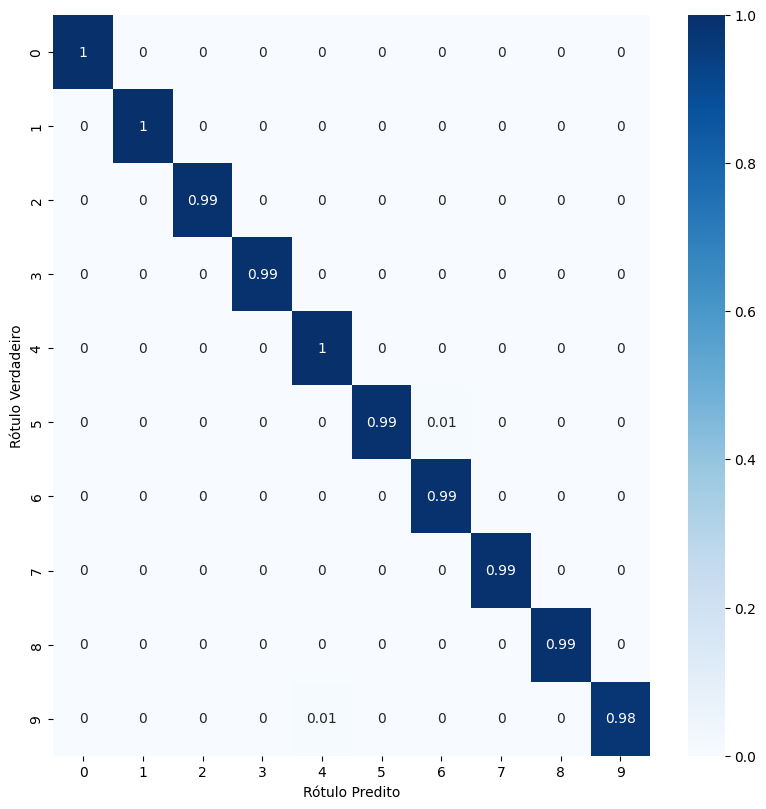

In [11]:
plt.figure(figsize=(8, 8))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')
plt.show()


In [12]:
total_tp = total_fp = total_fn = total_tn = np.array([])

for i in range(len(cm)):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)

    total_tp = np.append(total_tp, tp)
    total_fp = np.append(total_fp, fp)
    total_fn = np.append(total_fn, fn)
    total_tn = np.append(total_tn, tn)


In [13]:
total_tp = np.mean(total_tp)
total_fp = np.mean(total_fp)
total_fn = np.mean(total_fn)
total_tn = np.mean(total_tn)
total = total_tp + total_fp + total_fn + total_tn

acuracia = (total_tp + total_tn) / total if total > 0 else 0
precisao = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
sensibilidade = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0
especificidade = total_tn / (total_tn + total_fp) if (total_tn + total_fp) > 0 else 0
f1_score = (2 * precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0

print("Acurácia:", acuracia)
print("Precisão:", precisao)
print("Sensibilidade:", sensibilidade)
print("Especificidade:", especificidade)
print("F1 Score:", f1_score)


Acurácia: 0.9982400000000001
Precisão: 0.9912000000000001
Sensibilidade: 0.9912000000000001
Especificidade: 0.9990222222222223
F1 Score: 0.9912000000000001


In [14]:
print(classification_report(y_true, y_pred, target_names=classes))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

